In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [108]:
df = pd.read_csv("/content/auto-mpg.csv")

In [109]:
X = df.drop("mpg", axis=1)
y = df["mpg"]

In [110]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [111]:
X.isnull().sum()

,0
cylinders,0
displacement,0
horsepower,2
weight,0
acceleration,0
model-year,0


In [112]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [113]:
print(X.isnull().sum())
avg = X["horsepower"].mean()
X["horsepower"].fillna(avg, inplace=True)

cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64


<ipython-input-113-3166f90a7309>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["horsepower"].fillna(avg, inplace=True)


In [114]:
X.isnull().sum()

,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model-year,0


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [117]:
#Model training with Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

In [119]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 9.442519317084798
R² Score: 0.8243789497964555


In [120]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores)
print("Mean Cross-Validation R² Score:", np.mean(scores))

Cross-Validation R² Scores: [0.5481797  0.66988714 0.82343031 0.68329027 0.14048664]
Mean Cross-Validation R² Score: 0.573054812177131


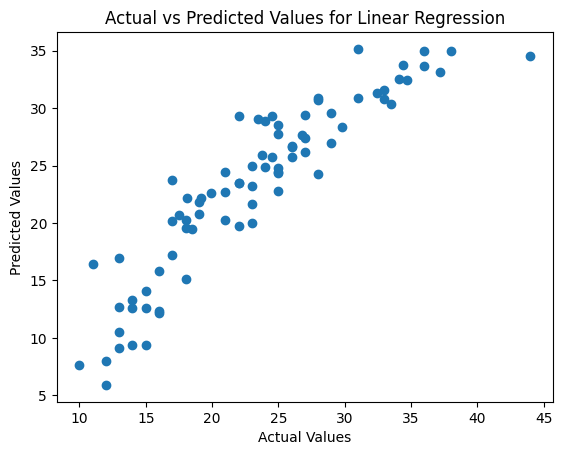

In [121]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Linear Regression")
plt.show()

In [122]:
#Model training with Random Forest Regression Model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [123]:
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 5.127940975
R² Score: 0.9046256248815043


In [124]:
scores2 = cross_val_score(model2, X_scaled, y, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", scores2)
print("Mean Cross-Validation R² Score:", np.mean(scores2))

Cross-Validation R² Scores: [0.89873358 0.83940156 0.87424688 0.79341091 0.3937332 ]
Mean Cross-Validation R² Score: 0.7599052258662192


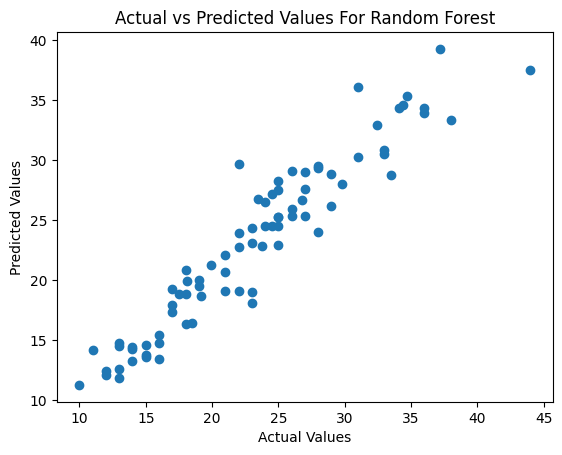

In [125]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values For Random Forest")
plt.show()